## Analysis 2020 Notebook 02 Transect - Beach Widths

Here's what we'll do (we'll probably do more, but this is a start.):

- import beach transect eidths data into pandas
- plot histograms and kdes for selected transects each year: normal? 
- plot mean/median beach widths by transect by survey
- plot mean/median width by group by survey

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [271]:
# IMPORT DATA:
data_path = '../../../data/transect_widths/'
plot_path = '../../../miscellaneous/Webinar Nov 2020/'
data_files = ['PI_Transect_2016_02.csv','PI_Transect_2016_05.csv','PI_Transect_2016_08.csv',
             'PI_Transect_2016_10.csv','PI_Transect_2017_02.csv','PI_Transect_2017_04.csv',
             'PI_Transect_2017_08.csv','PI_Transect_2020_01.csv','PI_Transect_2020_04.csv',
             'PI_Transect_2020_07.csv','PI_Transect_2020_10.csv']

list_of_data_to_concatenate = []

for data_file in data_files:
    list_of_data_to_concatenate.append(pd.read_csv(data_path+data_file))
    
df = pd.concat(list_of_data_to_concatenate, axis=0)
    
df

,OBJECTID,Shape_Length,TransectID,SampleDate,LineID
0,1,55.989572,C01,2016/02/17 00:00:00,2016_02_C01
1,2,53.045967,C02,2016/02/17 00:00:00,2016_02_C02
2,3,40.822807,C03,2016/02/17 00:00:00,2016_02_C03
3,4,28.932401,C04,2016/02/17 00:00:00,2016_02_C04
4,5,20.106200,C05,2016/02/17 00:00:00,2016_02_C05
...,...,...,...,...,...
22,23,33.116898,T12,2020/10/14 00:00:00,2020_10_T12
23,24,32.954934,T13,2020/10/14 00:00:00,2020_10_T13
24,25,34.403394,T14,2020/10/14 00:00:00,2020_10_T14
25,26,18.011247,T15,2020/10/14 00:00:00,2020_10_T15


In [272]:
# CONVERT SampleDate FIELD TO PYTHON DATETIME:

df['Sample Date'] =  pd.to_datetime(df['SampleDate'], format='%Y/%m/%d %H:%M:%S')

In [273]:
df['Sample Date'].unique()

array(['2016-02-17T00:00:00.000000000', '2016-05-10T00:00:00.000000000',
       '2016-08-16T00:00:00.000000000', '2016-10-28T00:00:00.000000000',
       '2017-02-19T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-04-27T00:00:00.000000000', '2020-07-13T00:00:00.000000000',
       '2020-10-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [274]:
# ADD A SURVEY ID FIELD BUILT OFF THE YEAR AND MONTH PARTS OF THE EXISTING LineID:

year = df['LineID'].str[0:4]
month = df['LineID'].str[6:7]
df['Survey'] = df['LineID'].str[5:7]+'-'+df['LineID'].str[0:4]

In [275]:
df

,OBJECTID,Shape_Length,TransectID,SampleDate,LineID,Sample Date,Survey
0,1,55.989572,C01,2016/02/17 00:00:00,2016_02_C01,2016-02-17,02-2016
1,2,53.045967,C02,2016/02/17 00:00:00,2016_02_C02,2016-02-17,02-2016
2,3,40.822807,C03,2016/02/17 00:00:00,2016_02_C03,2016-02-17,02-2016
3,4,28.932401,C04,2016/02/17 00:00:00,2016_02_C04,2016-02-17,02-2016
4,5,20.106200,C05,2016/02/17 00:00:00,2016_02_C05,2016-02-17,02-2016
...,...,...,...,...,...,...,...
22,23,33.116898,T12,2020/10/14 00:00:00,2020_10_T12,2020-10-14,10-2020
23,24,32.954934,T13,2020/10/14 00:00:00,2020_10_T13,2020-10-14,10-2020
24,25,34.403394,T14,2020/10/14 00:00:00,2020_10_T14,2020-10-14,10-2020
25,26,18.011247,T15,2020/10/14 00:00:00,2020_10_T15,2020-10-14,10-2020


In [276]:
# ADD A FIELD THAT CONTAINS THE SURVEY DATE AS JULIAN DAYS/DATES:

# add 0.5 to bring date to whole day (Julian dates start counting at mid-day)
df['DateJ'] = pd.DatetimeIndex(df['Sample Date']).floor('d').to_julian_date()+0.5    # convert datetime to julian date (easier to plot quickly)

In [277]:
# ADD FIELD CONTAINING GREGORIAN DATES (CONVERT FROM JULIAN DATES):

df['DateG'] = pd.to_datetime(df['DateJ']-0.5, unit='D', origin='julian')
df

,OBJECTID,Shape_Length,TransectID,SampleDate,LineID,Sample Date,Survey,DateJ,DateG
0,1,55.989572,C01,2016/02/17 00:00:00,2016_02_C01,2016-02-17,02-2016,2457436.0,2016-02-17
1,2,53.045967,C02,2016/02/17 00:00:00,2016_02_C02,2016-02-17,02-2016,2457436.0,2016-02-17
2,3,40.822807,C03,2016/02/17 00:00:00,2016_02_C03,2016-02-17,02-2016,2457436.0,2016-02-17
3,4,28.932401,C04,2016/02/17 00:00:00,2016_02_C04,2016-02-17,02-2016,2457436.0,2016-02-17
4,5,20.106200,C05,2016/02/17 00:00:00,2016_02_C05,2016-02-17,02-2016,2457436.0,2016-02-17
...,...,...,...,...,...,...,...,...,...
22,23,33.116898,T12,2020/10/14 00:00:00,2020_10_T12,2020-10-14,10-2020,2459137.0,2020-10-14
23,24,32.954934,T13,2020/10/14 00:00:00,2020_10_T13,2020-10-14,10-2020,2459137.0,2020-10-14
24,25,34.403394,T14,2020/10/14 00:00:00,2020_10_T14,2020-10-14,10-2020,2459137.0,2020-10-14
25,26,18.011247,T15,2020/10/14 00:00:00,2020_10_T15,2020-10-14,10-2020,2459137.0,2020-10-14


In [278]:
# ADD A GROUP FIELD TO ID RECORDS WITH CONTROL AND IMPACT (TREATMENT) TRANSECT GROUPS:

df.loc[df['TransectID'].str[0] == 'C', 'Group'] = 'Control'
df.loc[df['TransectID'].str[0] == 'T', 'Group'] = 'Impacted'

In [168]:
# GENERATE EQUI-DISTANT SPACED LABELS FOR PLOT Z-AXES TO REPLACE JULIAN DATES:

dates = df['DateJ'].unique()

xtics = []
start_tic = dates.min()
increment = (dates.max() - dates.min())/len(dates)

for multiplier in range(12):
    offset = multiplier*increment
    xtics.append(start_tic + offset)

# create the replacement tic labels:
xticlbls = df['Survey'].unique()

In [280]:
# GENERATE NON-EQUI-DISTANT SPACED LABELS FOR PLOT Z-AXES TO REPLACE JULIAN DATES:

xtics = df['DateJ'].unique()

xticlbls = df['Survey'].unique()

## The Study Area - Overall (Control and Treatment Transects Mixed):

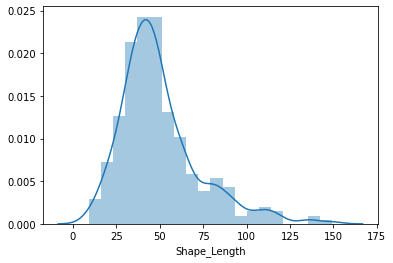

In [281]:
# PLOT GLOBAL HISTOGRAM:
sns.distplot(df['Shape_Length']);

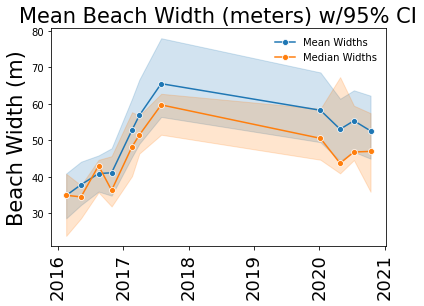

In [292]:
# PLOT MEAN BEACH WIDTHS MEASURED ALONG TRANSECTS - BASED ON TRANSECT PROFILE DISTANCES:
sns.lineplot(x='DateG',y='Shape_Length', data=df, MARKER='o', label='Mean Widths')
sns.lineplot(x='DateG',y='Shape_Length', data=df, estimator=np.median, marker='o', label='Median Widths')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('')
plt.ylabel('Beach Width (m)', fontsize=21)
plt.title('Mean Beach Width (meters) w/95% CI', fontsize=21)
plt.legend(loc='best', frameon=False)
plt.savefig(plot_path+'MeanMedianBeachWidthOverall.png');

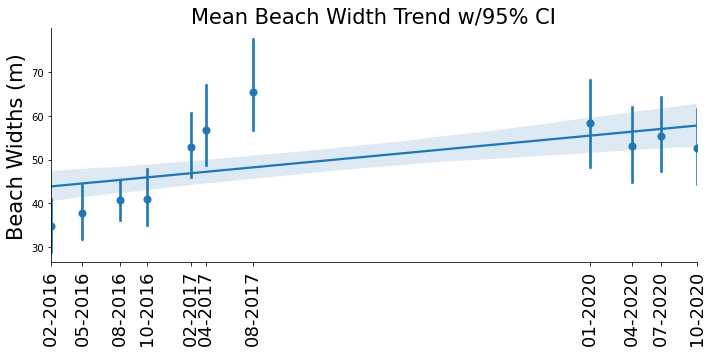

In [291]:
# ANY TRENDS TIED TO MEAN BEACH WIDTHS?:

sns.lmplot(x='DateJ',y='Shape_Length',data=df,x_estimator=np.mean,ci=95, height=5, aspect=2)
plt.xticks(xtics, xticlbls, rotation=90, fontsize=18)
plt.xlabel('')
plt.ylabel('Beach Widths (m)', fontsize=21)
plt.title('Mean Beach Width Trend w/95% CI', fontsize=21)
plt.tight_layout()
plt.savefig(plot_path+'BeachWidthTrendOverall.png');

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OBJECTID      294 non-null    int64         
 1   Shape_Length  294 non-null    float64       
 2   TransectID    294 non-null    object        
 3   SampleDate    294 non-null    object        
 4   LineID        294 non-null    object        
 5   Sample Date   294 non-null    datetime64[ns]
 6   Survey        294 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.4+ KB


## The Study Area - Partitioned by Control Impact Groups:

Tells us something about the spatial stability of the beach

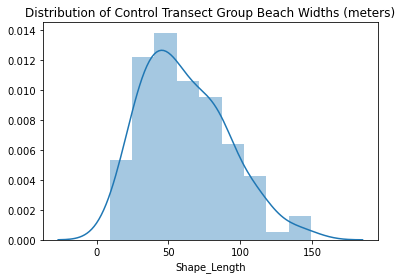

In [284]:
# CONTROL GROUP HISTOGRAMS W/KDES:

sns.distplot(df['Shape_Length'].loc[df['Group'] == 'Control'])
plt.title('Distribution of Control Transect Group Beach Widths (meters)');

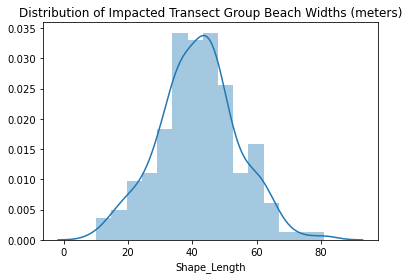

In [285]:
# IMPACTED GROUP HISTOGRAMS w/KDES:

sns.distplot(df['Shape_Length'].loc[df['Group'] == 'Impacted'])
plt.title('Distribution of Impacted Transect Group Beach Widths (meters)');

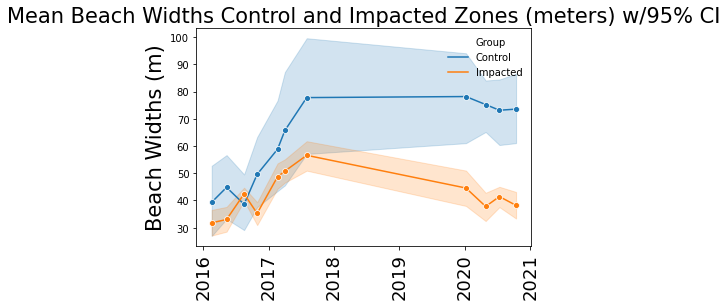

In [289]:
# # PLOT BEACH WIDTHS BY GROUP MEASURED ALONG TRANSECTS (MEANS):
sns.lineplot(x='DateG',y='Shape_Length', hue='Group', data=df, marker='o')
#sns.lineplot(x='Survey',y='Shape_Length', data=df.loc[df['Group'] == 'T'])

plt.xticks(rotation=90, fontsize=18)
plt.xlabel('')
plt.ylabel('Beach Widths (m)', fontsize=21)
plt.title('Mean Beach Widths Control and Impacted Zones (meters) w/95% CI', fontsize=21)
plt.legend(frameon=False)
plt.savefig(plot_path+'MeanBeachWidthsCandI.png');
#plt.tight_layout();

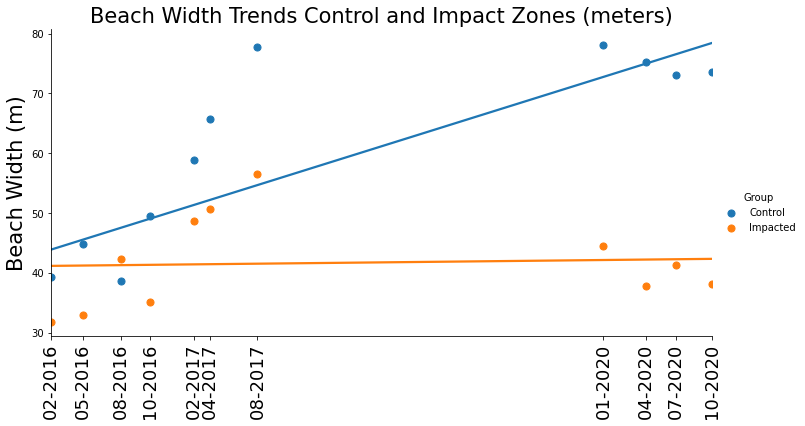

In [288]:
# ANY TRENDS TIED TO BEACH WIDTHS BY GROUP LOCATION?:


sns.lmplot('DateJ',y='Shape_Length',data=df, hue='Group', x_estimator=np.mean, ci=None, robust=True, height=5, aspect=2)

plt.xticks(xtics, xticlbls, rotation=90, fontsize=18)
plt.xlabel('')
plt.ylabel('Beach Width (m)', fontsize=21)
plt.title('Beach Width Trends Control and Impact Zones (meters)', fontsize=21)
#plt.tight_layout()
plt.savefig(plot_path+'BeachWidthTrendsCandI.png');